In [1]:
import math
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const

***Isothermal Plug Flow Reactor Model***

For a chemical reaction in a reactor C [mol m$^{-3}$] stands for concentration and for R [mol m$^{-3}$ s$^{-1}$] is the reaction rate. u is the superficial velocity [m s$^{-1}$]. The reaction rate depends on temperature and the concentration of species C. Here we can understand C as a vector that contains the concentrations of all species in the mixture. For steady state we have:

\begin{equation*}0 = - u \frac{d C}{d z} + D \frac{d^2 C}{d z^2} + R\left(C,T\right) \tag{1}\end{equation*}

If we further assume that there is no axial dispersion, we get the very widely used plug flow reactor model:

\begin{equation*}0 = - u \frac{d C}{d z} + R\left(C,T\right) \tag{2}\end{equation*}

This is a differential equation that can be readily solved with any ODE solver but for simple reaction terms also analytical solutions can be found. Let’s assume that we have a chemical reaction A + B -> C

\begin{align*}r_A &= -k_{AB} C_A C_B \tag{3}\\r_B &= -k_{AB} C_A C_B \tag{4}\\r_C &= k_{AB} C_A C_B \tag{5}\end{align*}

Now we can write down our system of ordinary differential equations (ODE):

\begin{align*}\frac{d C_A}{d z} &= \frac{r_{A}}{u} \tag{6}\\\frac{d C_B}{d z} &= \frac{r_{B}}{u} \tag{7}\\\frac{d C_C}{d z} &= \frac{r_{C}}{u} \tag{8}\end{align*}

1st method

Text(0, 0.5, 'concentration')

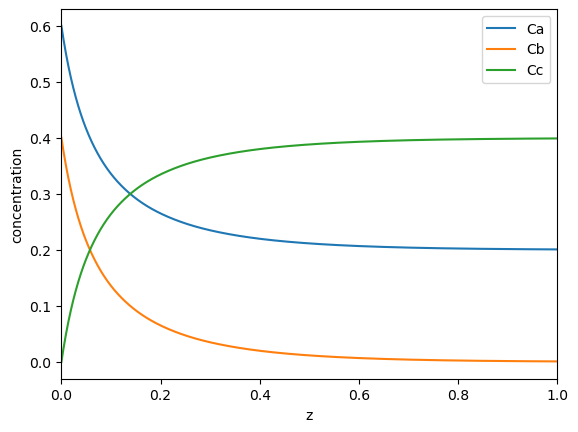

In [2]:
# velocity u in the reactor tube in m/s
u = 4.0
# reaction kinetic coefficient in m3/(mol.s)
kAB = 1.0e2

def pfr(z, Y):
    # assign each concentration to a vector
    Ca, Cb, Cc = Y
       
    ra = -kAB * Ca * Cb
    rb = -kAB * Ca * Cb
    rc = kAB * Ca * Cb
    
    dCa = ra/u
    dCb = rb/u
    dCc = rc/u

    return np.array([dCa, dCb, dCc], dtype = object)

# initial values
span = np.linspace(0, 1.0, 1000)
y0 = [0.6, 0.4, 0.0]

sol = solve_ivp(pfr, [span[0], span[-1]], y0, t_eval = span)

Ca, Cb, Cc = sol.y

plt.plot(sol.t, Ca, label = 'Ca')
plt.plot(sol.t, Cb, label = 'Cb')
plt.plot(sol.t, Cc, label = 'Cc')
plt.xlim((0., 1.0))
plt.legend()
plt.xlabel('z')
plt.ylabel('concentration')

2nd method

(0.0, 1.0)

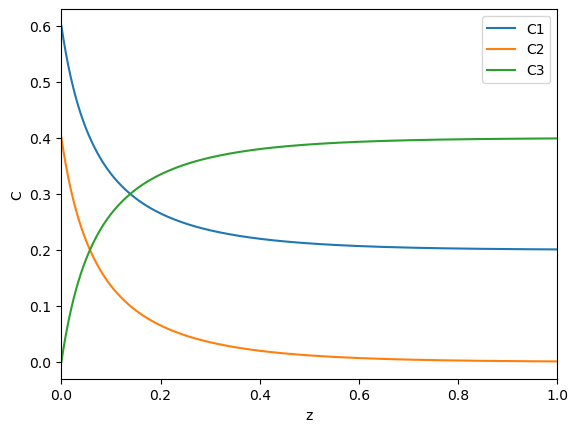

In [3]:
u = 4.0
kAB = 1.0e2

def simple_reaction(C, k):
    
    r = k * C[0] * C[1]
    
    return [-r, -r, r]

# next define the plug flow reactor model
def pfr(z, C, u, model_param, reaction_model):
    
    rate = reaction_model(C, model_param)
    
    return [r / u for r in rate] 

# initial values
C0 = [0.6, 0.4, 0.0]
span = np.linspace(0, 1.0, 1000)

sol = solve_ivp(pfr, [span[0], span[-1]], C0, t_eval = span, args = (u, kAB, simple_reaction))

plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.plot(sol.t, sol.y[2,:])
plt.xlabel("z")
plt.ylabel("C")
plt.legend(["C1", "C2", "C3"])
plt.xlim((0., 1.0))

***Isothermal Plug Flow Reactor Model***

This is a differential equation that can be readily solved with any ODE solver but for simple reaction terms also analytical solutions can be found. Let’s assume that we have a chemical reaction A + B -> C but now we have ***equilibrium***.

\begin{align*}r_A = -k_{AB} C_A C_B + k_C C_C \tag{9}\\r_B = -k_{AB} C_A C_B + k_C C_C \tag{10}\\r_C = k_{AB} C_A C_B - k_C C_C \tag{11}\end{align*}

Now we can write down our system of ordinary differential equations (ODE):

\begin{align*}\frac{d C_A}{d z} &= \frac{r_A}{u} \tag{12}\\\frac{d C_B}{d z} &= \frac{r_B}{u} \tag{12}\\\frac{d C_C}{d z} &=\frac{r_C}{u} \tag{13}\end{align*}

1st method

Text(0, 0.5, 'concentration')

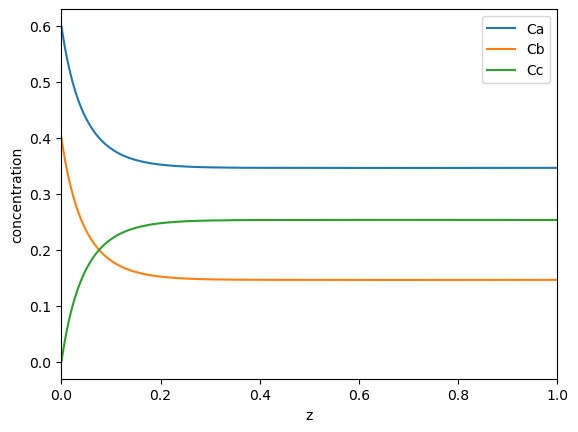

In [4]:
def pfr(z, Y):
    # assign each concentration to a vector
    Ca, Cb, Cc = Y
    
    # velocity u in the reactor tube in m/s
    u = 4.0
    
    kAB = 1.0e2
    kC = 0.2e2

    ra = -kAB * Ca * Cb + kC*Cc
    rb = -kAB * Ca * Cb + kC*Cc
    rc = kAB * Ca * Cb - kC*Cc
    
    dCa = ra/u
    dCb = rb/u
    dCc = rc/u

    return np.array([dCa, dCb, dCc], dtype = object)

# initial values
span = np.linspace(0, 1.0, 1000)
y0 = [0.6, 0.4, 0.0]

sol = solve_ivp(pfr, [span[0], span[-1]], y0, t_eval = span)

Ca, Cb, Cc = sol.y

plt.plot(sol.t, Ca, label = 'Ca')
plt.plot(sol.t, Cb, label = 'Cb')
plt.plot(sol.t, Cc, label = 'Cc')
plt.xlim((0., 1.0))
plt.legend()
plt.xlabel('z')
plt.ylabel('concentration')

2nd method

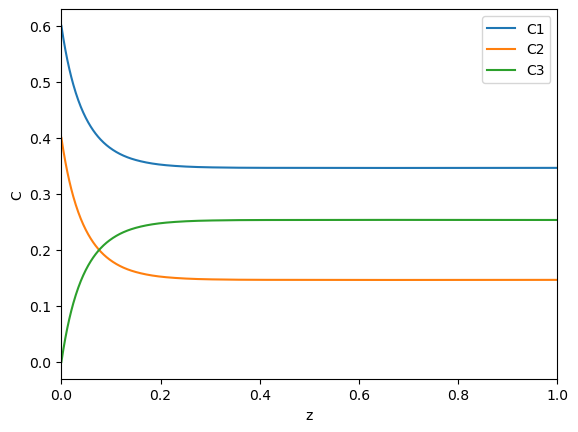

In [5]:
def equilibrium_reaction(C, k): 
    
    r1 = k[0] * C[0] * C[1]
    r2 = k[1] * C[2]
    
    return [-r1 + r2, -r1 + r2, r1 - r2]

def pfr(z, C, u, model_param, reaction_model):
    
    rate = reaction_model(C, model_param)
    
    return [r / u for r in rate] 

k = [1.0e2, 0.2e2]

C0 = [0.6, 0.4, 0.0]
span = np.linspace(0, 1.0, 1000)

sol = solve_ivp(pfr, [span[0], span[-1]], C0, t_eval = span, args = (u, k, equilibrium_reaction))

#Let's plot the results
plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.plot(sol.t, sol.y[2,:])
plt.xlabel("z")
plt.ylabel("C")
plt.legend(["C1", "C2", "C3"])
plt.xlim((0., 1.0))
plt.show()

***Isothermal Plug Flow Reactor Model***

A + B -> C and C + B -> D

\begin{align*}r_A &= -k_{AB} C_A C_B \tag{14}\\r_B &= -k_{AB} C_A C_B \tag{15}\\r_C &= k_{AB} C_A C_B - k_{CB} C_C C_B \tag{16}\\r_D &= k_{CB} C_C C_B \tag{17}\end{align*}

Now we can write down our system of ordinary differential equations (ODE):

\begin{align*}\frac{d C_A}{d z} &= \frac{r_A}{u} \tag{18}\\\frac{d C_B}{d z} &= \frac{r_B}{u} \tag{19}\\\frac{d C_C}{d z} &=\frac{r_C}{u} \tag{20}\\\frac{d C_D}{d z} &= \frac{r_D}{u} \tag{21}\end{align*}

1st method

Text(0, 0.5, 'concentration')

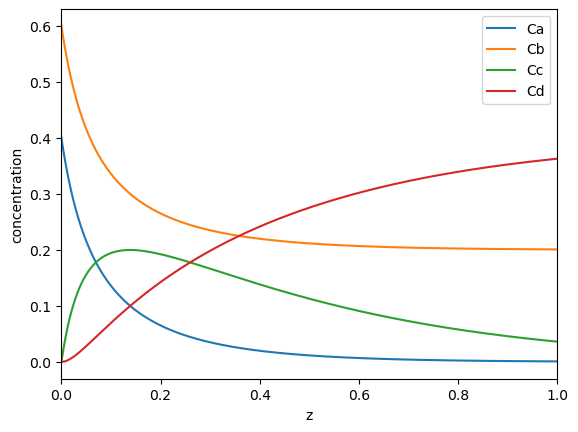

In [6]:
def pfr(z, Y):
    # assign each concentration to a vector
    Ca, Cb, Cc, Cd = Y
    
    kAB = 1.0e2
    kCB = 0.5e2
    u = 4.0
    
    ra = -kAB * Ca * Cb
    rb = -kAB * Ca * Cb
    rc = kAB * Ca * Cb - kCB * Cc* Cb
    rd = kCB * Cc * Cb
    
    dCa = ra/u
    dCb = rb/u
    dCc = rc/u
    dCd = rd/u

    return np.array([dCa, dCb, dCc, dCd], dtype = object)

span = np.linspace(0, 1.0, 1000)
y0 = np.array([0.4, 0.6, 0.0, 0.0])

sol = solve_ivp(pfr, [span[0], span[-1]], y0, t_eval = span)

Ca, Cb, Cc, Cd = sol.y

plt.plot(sol.t, Ca, label = 'Ca')
plt.plot(sol.t, Cb, label = 'Cb')
plt.plot(sol.t, Cc, label = 'Cc')
plt.plot(sol.t, Cd, label = 'Cd')
plt.xlim((0., 1.0))
plt.legend()
plt.xlabel('z')
plt.ylabel('concentration')

2nd method

(0.0, 1.0)

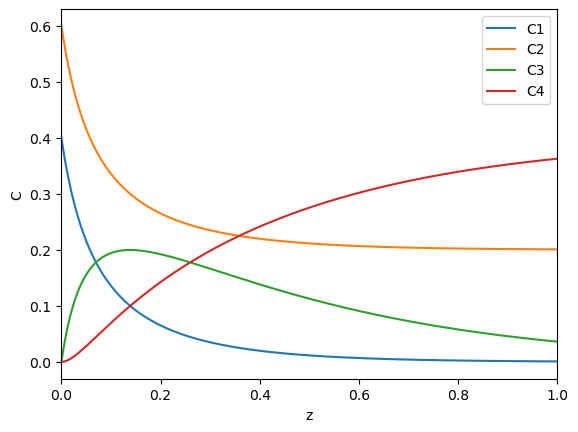

In [7]:
def simple_reaction(C, k): 
    
    r1 = k[0] * C[0] * C[1]
    r2 = k[1] * C[2] * C[1]
    
    return [-r1, -r1, r1 - r2, r2]

def pfr(z, C, u, model_param, reaction_model):
    
    rate = reaction_model(C, model_param)
    
    return [r / u for r in rate] 

k = [1.0e2, 0.5e2]

# Now we have four species, so the list of initial concentrations must also  have length 4
span = np.linspace(0, 1.0, 1000)
C0 = [0.4, 0.6, 0.0, 0.0]

sol = solve_ivp(pfr, [span[0], span[-1]], C0, t_eval = span, args = (u, k, simple_reaction))

plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.plot(sol.t, sol.y[2,:])
plt.plot(sol.t, sol.y[3,:])
plt.xlabel("z")
plt.ylabel("C")
plt.legend(["C1", "C2", "C3", "C4"])
plt.xlim((0., 1.0))

***Adiabatic Plug Flow Reactor***

Until now we have assumed our reactors to be isothermal, meaning that the temperature is constant. This is also often true for small laboratory reactors where temperature can be exactly controlled. In large industrial reactors this can usually not be achieved. Those are usually insulated so that they can be modeled as adiabatic reactors, meaning that there is no exchange of heat with the surroundings. In order to model this we need to take the heat balance into the equation. The temperature dependence of chemical reactions is described by the Arrhenius equation:

\begin{equation*}r = Ae^\frac{-E_a}{RT} \tag{22}\end{equation*}

where A is the pre-exponential factor, E$_a$ is the activation energy, R is the universal gas constant, and T is temperature in Kelvin.

The ***energy balance*** of the reactor is expressed very similarly to the mole balance. Then our model equation becomes:

\begin{equation*}0 = - u \frac{d \left(\rho C_p T\right)}{d z} + \Delta H \tag{23}\end{equation*}

And if we can assume ρ and C$_p$ constant

\begin{equation*}0 = - u \rho C_p \frac{dT}{d z} + \Delta H \tag{24}\end{equation*}

\begin{equation*}\frac{dT}{d z} = \frac{\Delta H}{u \rho C_p} \tag{25}\end{equation*}

where

\begin{equation*}\Delta H = \sum_{i=1}^n r_i H_i \tag{26}\end{equation*}

We put all the variables into a vector Y = (C$_i$ H ) and the changes into a vector dY.

The reaction rates are the following:

\begin{align*}r_A &= -k_{AB} C_A C_B \tag{27}\\r_B &= -k_{AB} C_A C_B \tag{28}\\r_C &= k_{AB} C_A C_B \tag{29}\end{align*}

Now we can write down our system of ordinary differential equations (ODE):

\begin{align*}\frac{d C_A}{d z} &= \frac{r_{A}}{u} \tag{30}\\\frac{d C_B}{d z} &= \frac{r_{B}}{u} \tag{31}\\\frac{d C_C}{d z} &= \frac{r_{C}}{u} \tag{32}\end{align*}

1st method

(0.0, 1.0)

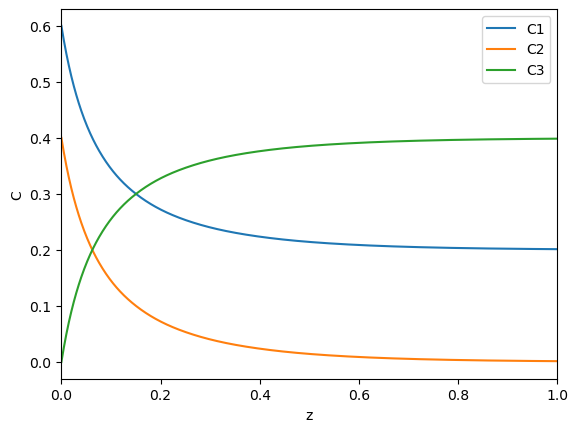

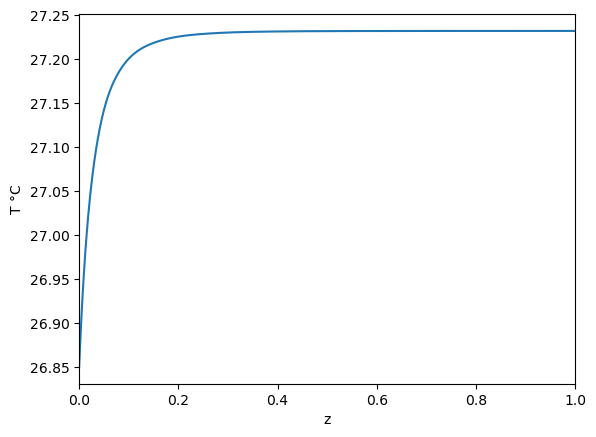

In [8]:
def arrh(A, Ea, T): 
    
    return A * math.exp(-Ea/(const.R * T))

def pfr(z, Y):
    
    # assign each concentration to a vector
    Ca, Cb, Cc, T = Y
    
    # velocity u in the reactor tube in m/s
    u = 4.0
    
    # reaction kinetic coefficient in m3/(mol s)
    ra = -arrh(100., 200., T) * Ca * Cb
    rb = -arrh(100., 200., T) * Ca * Cb
    rc = arrh(100., 200., T) * Ca * Cb
    
    # enthalpies of species
    H_A = 0.
    H_B = -100.
    H_C = -300.
    
    dHrxn = - ra * H_A - rb * H_B + rc * H_C
    
    dCa = ra/u
    dCb = rb/u
    dCc = rc/u
    
    rho = 900.
    Cp = 4.
    dT = ra*dHrxn/(u*Cp*rho)

    return np.array([dCa, dCb, dCc, dT], dtype = object)

span = np.linspace(0, 1.0, 1000)
y0 = np.array([0.6, 0.4, 0.0, 300.0])

sol = solve_ivp(pfr, [span[0], span[-1]], y0, t_eval = span)

Ca, Cb, Cc, T = sol.y

plt.figure()
plt.plot(sol.t, Ca)
plt.plot(sol.t, Cb)
plt.plot(sol.t, Cc)
plt.xlabel("z")
plt.ylabel("C")
plt.legend(["C1", "C2", "C3"])
plt.xlim((0., 1.0))

plt.figure()
plt.plot(sol.t, T - 273.15)
plt.xlabel("z")
plt.ylabel("T °C")
plt.xlim((0., 1.0))

2nd method

(0.0, 1.0)

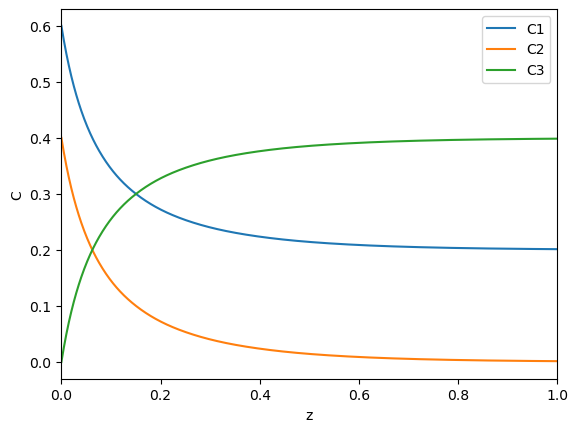

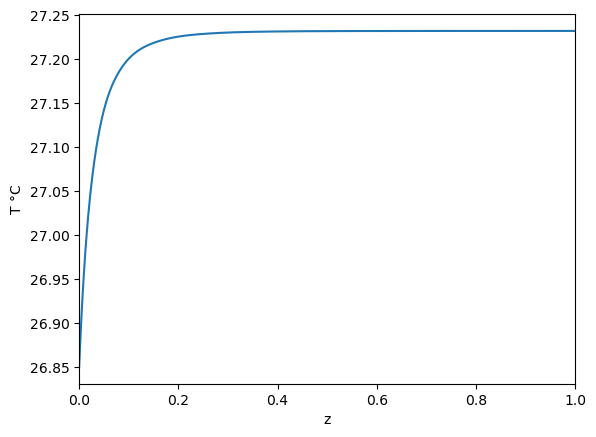

In [9]:
def arrh(A, Ea, T): 
    
    return A * math.exp(-Ea/(const.R * T))

def simple_reaction(C, k, T):
    
    r = arrh(k[0], k[1], T) * C[0] * C[1]
    
    return [-r, -r, r]

def calc_DeltaH(r):
    H_A = 0.
    H_B = -100.
    H_C = -300.
    return -r[0] * H_A - r[1] * H_B + r[2] * H_C

# adiabatic plug flow reactor model
def pfr(z, Y, u, model_param, reaction_model, rho, Cp):
    
    C = Y[0:-1]
    T = Y[-1]
    
    rate = reaction_model(C, model_param, T)
    deltaH = calc_DeltaH(rate)
    
    # temperature change due to reaction
    dT = rate[0] * deltaH / (u * rho * Cp)
    
    # concentration changes for the components
    dC = [r / u for r in rate]
    
    # assemble the vector dY
    dY = dC
    dY.append(dT)
    
    return dY

u = 4.0
k = (100., 200.0)
rho = 900.
Cp = 4.

span = np.linspace(0, 1.0, 1000)
C0 = [0.6, 0.4, 0.0, 300.0]

sol = solve_ivp(pfr, [span[0], span[-1]], C0, t_eval = span, args = (u, k, simple_reaction, rho, Cp))

plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.plot(sol.t, sol.y[2,:])
plt.xlabel("z")
plt.ylabel("C")
plt.legend(["C1", "C2", "C3"])
plt.xlim((0., 1.0))

plt.figure()
plt.plot(sol.t, sol.y[3,:] - 273.15)
plt.xlabel("z")
plt.ylabel("T °C")
plt.xlim((0., 1.0))

***Adiabatic Plug Flow Reactor***

For reactions in the gas phase or for multiphase reactors where one of the flowing phases through the reactor is gaseous, the form of the equations with concentration as variable is not very convenient. That is because the volume of the fluid changes with changing temperature and due to stoichiometry. Instead, it is favorable to do a change of variables uC = F where F = mol m$^{-2}$ s$^{-1}$. (Equally well we could use Ṅ = FA where A is the cross-section area of the reactor.) More technically this kind of Flowrate divided by cross section is called a flux.

Let’s recall the convection-diffusion equation from the beginning:

\begin{equation*}\frac{\partial C}{\partial t} = - \frac{\partial \left(uC\right)}{\partial z} + \frac{\partial}{\partial z}\left(D\frac{\partial C}{\partial z}\right) + S\left(\psi,z\right) \tag{33}\end{equation*}

And let’s assume again steady state, no axial dispersion (D = 0), and substitute F for uC:

Then the model equation becomes:

\begin{equation*}0 = - \frac{d F_i}{d z} + R\left(p_{i…n},T\right) \tag{34}\end{equation*}

Here we have assumed that the Reaction rate R depends on the partial pressures of the species. Rearranging the equation and we can again easily solve using and ODE solver:

\begin{equation*}\frac{d F_i}{d z} = R\left(p_{i…n},T\right) \tag{35}\end{equation*}

Let’s look at an example. Let’s look again at a reaction A + B -> C but this time in the gas phase. This means that volume changes during the reaction. This time the reaction terms shall depend on partial pressures of the components:

\begin{align*}r_A &= -k_{AB} p_A p_B \tag{36}\\r_B &= -k_{AB} p_A p_B \tag{37}\\r_C &= k_{AB} p_A p_B \tag{38}\end{align*}

where p$_i$ = x$_i$P where P is total pressure and \begin{equation*}x_i = \frac{F_i}{\sum_{j=1}^n F_j} \tag{39}\end{equation*}. 

Of course this form also works for liquid phase. Then simply C$_i$ = x$_i$C$_{tot}$.

Let’s also include enthalpy change in our equations. For that we define a variable we can call “Enthalpy flux”: E = FH with units kJ s$^{-1}$ m$^2$ where H is the molar enthalpy in kJ/mol.

The equation for enthalpy flux then is:

\begin{equation*}\frac{d E}{d z} = \sum_{i=1}^n r_i H_i \tag{40}\end{equation*}

And to complete the model we should also construct a model for pressure drop. Pressure drop can either be calculated with a correlation, or it can be assumed constant. In gas-phase technical reactors pressure drop is often negligible in comparison with the total pressure. Here we assume the pressure drop to be constant.

\begin{equation*}\frac{d P}{d z} = const.\tag{41}\end{equation*}

Now our variables are complete. The target vector containing the variables is:

\begin{equation*}Y = \left(F_i E P\right) \tag{42}\end{equation*}

which accounts for n + 2 variables where n is the number of components in the system.

1st method

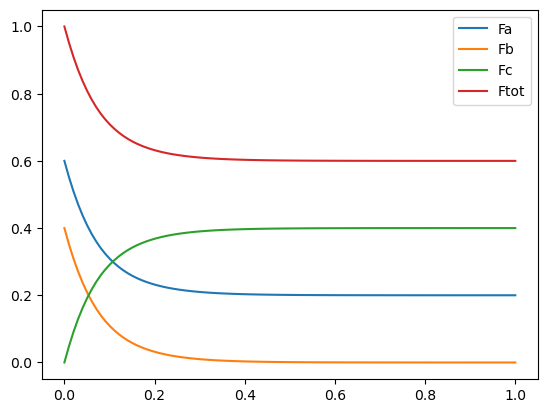

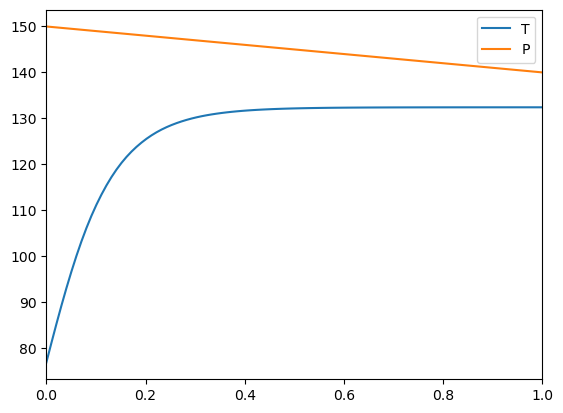

In [10]:
# define the reaction rate parameters and pressure (in kPa) and initial 
# temperature (in K)
P0 = 150.
T0 = 350.
dpdz = 10.

# physical properties: density rho in kg/m3 and themal capacity Cp in J/(mol K)
rho = 10.
Cp = 1.5

# function for the Arrhenius equation
def arrh(A, Ea, T): 
    
    return A * math.exp(-Ea/(const.R * T))

def pfr(z, Y):
    
    # assign each concentration to a vector
    Fa, Fb, Fc, E, P = Y
    Ftot = Fa + Fb + Fc
    
    xa = Fa/Ftot
    xb = Fb/Ftot
    xc = Fc/Ftot
    
    H = E/Ftot # since E = FH
    T = H/Cp # since ΔH = TCp
    
    # partial pressures
    Pa = xa*P
    Pb = xb*P
    
    ra = -arrh(1.0e-3, 200., T) * Pa * Pb
    rb = -arrh(1.0e-3, 200., T) * Pa * Pb
    rc = arrh(1.0e-3, 200., T) * Pa * Pb
    
    # enthalpies of species
    H_A = 0.
    H_B = -100.
    H_C = -300.
    
    dHrxn = -ra * H_A - rb * H_B + rc * H_C

    dFa = ra
    dFb = rb
    dFc = rc
    dE = dHrxn
    dP = -dpdz
    
    return np.array([dFa, dFb, dFc, dE, dP])

F0 = [0.6, 0.4, 0.0]
H0 = sum(F0) * Cp * T0
E0 = H0*sum(F0)

span = np.linspace(0, 1.0, 100)
y0 = np.array([0.6, 0.4, 0.0, E0, 150.])

sol = solve_ivp(pfr, [span[0], span[-1]], y0, t_eval = span)

Fa, Fb, Fc, E, P = sol.y
Ftot = Fa + Fb + Fc

plt.figure()
plt.plot(sol.t, Fa, label = 'Fa')
plt.plot(sol.t, Fb, label = 'Fb')
plt.plot(sol.t, Fc, label = 'Fc')
plt.plot(sol.t, Ftot, label = 'Ftot')
plt.legend()

plt.figure()
H = E / Ftot
T = H / Cp - 273.15
plt.plot(sol.t, T, label = 'T')
plt.plot(sol.t, P, label = 'P')
plt.xlim((0., 1.0))
plt.legend()

2nd method

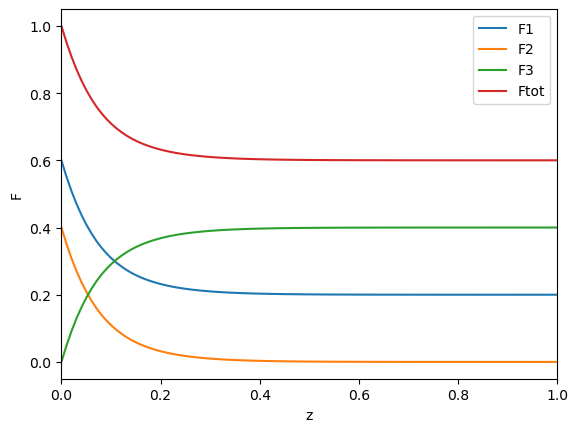

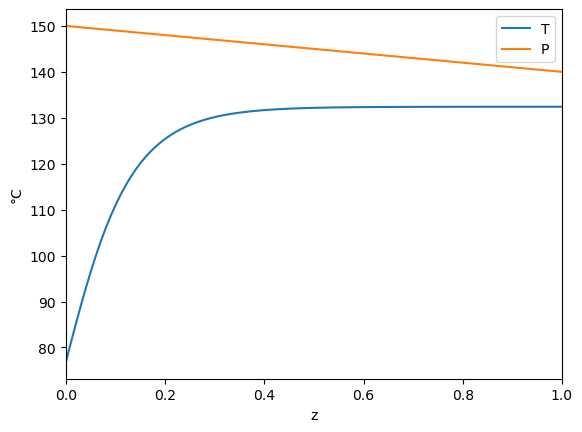

In [11]:
# define the reaction rate parameters and pressure (in kPa) and initial 
# temperature (in K)
k = [1.0e-3, 200.]
P0 = 150.
T0 = 350.
dpdz = 10.

# physical properties: density rho in kg/m3 and themal capacity Cp in J/(mol K)
rho = 10.
Cp = 1.5

# function for the Arrhenius equation
def arrh(A, Ea, T): 
    
    return A * math.exp(-Ea/(const.R * T))

# define the reaction rate model. It returns a list of reaction rates depending on partial pressures of the components.
def reaction_rates_gas(x, k, T, P): 
    
    r = arrh(k[0], k[1], T) * x[0] * x[1] * P * P
    
    return [-r, -r, r]

# function to calculate enthalpy change due to reaction
def calc_DeltaH(r):
    
    H_A = 0.
    H_B = -100.
    H_C = -300.
    
    return -r[0] * H_A - r[1] * H_B + r[2] * H_C

# define the plug flow reactor model
def pfr(z, Y, dpdz, model_param, reaction_model): 
    
    F = Y[0:-2]
    E = Y[-2]
    H = Y[-2] / F.sum()
    P = Y[-1]
    Ftot = F.sum()
    
    x = [fi / Ftot for fi in F]
    T = H / Cp
    
    # x: molar ratio, model_param
    r = reaction_model(x, model_param, T, P)
    
    # define differential equations
    dH = calc_DeltaH(r)
    dP = - dpdz
    
    # append the differential equations
    dY = r
    dY.append(dH)
    dY.append(dP)
    
    return dY

F0 = [0.6, 0.4, 0.0]
Y0 = F0
H0 = sum(F0) * Cp * T0
Y0.append(H0)
Y0.append(P0)

span = np.linspace(0, 1.0, 100)
sol = solve_ivp(pfr, [span[0], span[-1]], F0, t_eval = span, args = (dpdz, k, reaction_rates_gas))

# 0:3 means that index 3 is not included
Ftot = np.sum(sol.y[0:3, :], axis = 0)

plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.plot(sol.t, sol.y[2,:])

plt.plot(sol.t, Ftot)
plt.xlabel("z")
plt.ylabel("F")
plt.legend(["F1", "F2", "F3", "Ftot"])
plt.xlim((0., 1.0))
plt.show()

plt.figure()
P = sol.y[4,:]
H = E / Ftot
T = H / Cp - 273.15
plt.plot(sol.t, T)
plt.plot(sol.t, P)
plt.xlabel("z")
plt.ylabel("°C")
plt.legend(["T", "P"])
plt.xlim((0., 1.0))
plt.show()